# Excercise 6

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('L06_Ecommerce_Customers.csv')

In [2]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [3]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?
- No 

/home/kamil/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


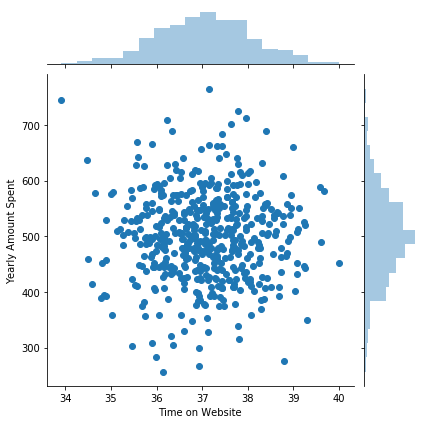

In [5]:
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=customers);

Do the same but with the Time on App column instead. 

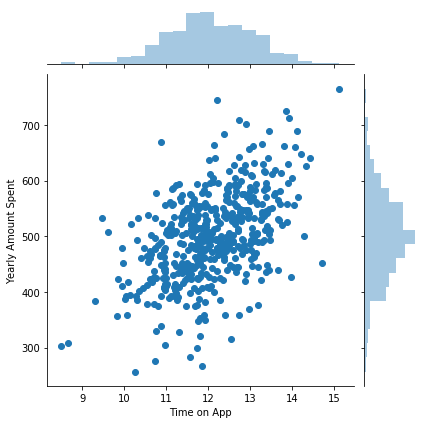

In [6]:
sns.jointplot(x="Time on App", y="Yearly Amount Spent", data=customers);

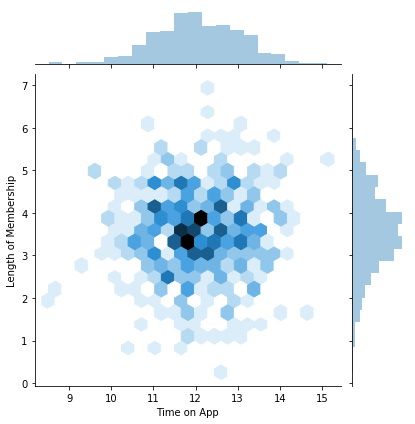

In [7]:
sns.jointplot(x="Time on App", y="Length of Membership", data=customers, kind="hex");

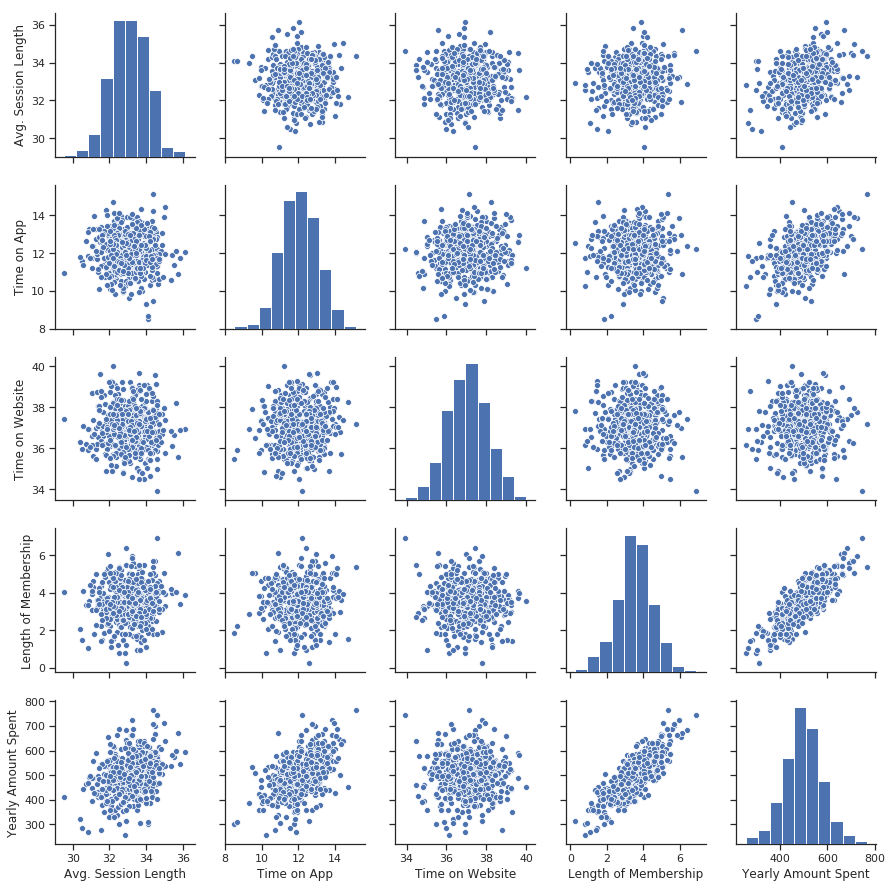

In [8]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=customers)

Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?
- Length of Membership

Create a linear model plot (using seaborn’s lmplot) of Yearly Amount Spent vs. Length of Membership.

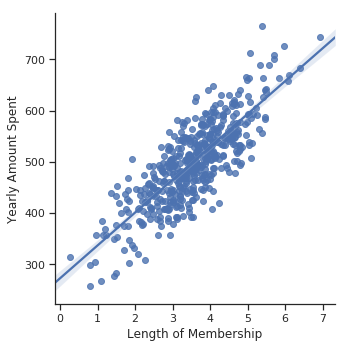

In [9]:
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=customers)

# Training and Testing Data


- Set a variable X equal to the numerical features of the customers and a variable y equal to the “Yearly Amount Spent” column. 
- Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101

In [10]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [11]:
X = customers.iloc[:, 3:7].values
y = customers.iloc[:, 7:8].values

In [12]:
# Splitting the dataset into Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# Training the Model


In [13]:
from sklearn.linear_model import LinearRegression 
# Create an instance of a LinearRegression() model named lm.
lm = LinearRegression()
lm.fit(X_train, y_train)
print('Coefficients:' ,lm.coef_)

Coefficients: [[25.98154972 38.59015875  0.19040528 61.27909654]]


# Predicting Test Data

In [14]:
y_pred = lm.predict(X_test)

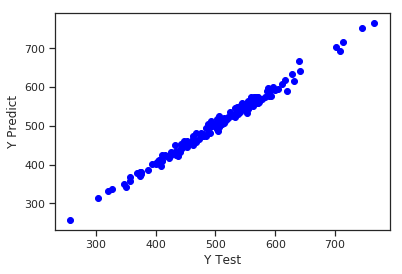

In [15]:
# Visualising the Linear Regreeesion results
plt.scatter(y_test, y_pred, color = 'blue')
plt.xlabel('Y Test')
plt.ylabel('Y Predict')
plt.show()

In [66]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 7.228148653430858
MSE: 79.81305165097501
RMSE: 8.933815066978665


# Residuals

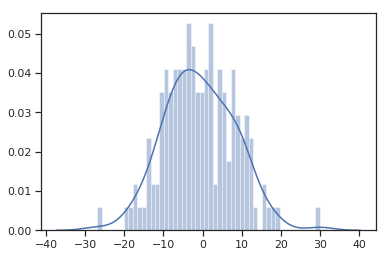

In [69]:
sns.distplot((y_test-y_pred),bins=50);

In [74]:
lm.coef_

array([[25.98154972, 38.59015875,  0.19040528, 61.27909654]])

First Coefficient is for Avg. Session Length, second Time on App, third for Time on Website and last Length of Membership. 
- 1 unit increase in Avg. Session Length is associated with an increase of 25.98 dollars spent
- exactly the same for each coefficient

In conclusion the company should focus more on their mobile app instead of website, because of higher profits.